In [141]:
%matplotlib inline
#useful: see what happens to our plots if you remove it!

In [142]:
#import everything we'll need
import sklearn 
import matplotlib.pyplot as plt #.pyplot is a collection of functions that
#make matplotlib work like MATLAB
import numpy as np 
import pandas as pd
import seaborn as sns #really good for statistics plots!
import math #comes with python, useful math functions







# matplotlib  demo
-matplotlib.pyplot so we're using the pyplot functions

- pyplot functions:
    - create figure(s)
    -make creates a plotting area in a figure 
    -plots some lines in a plotting areas
    -decorates plot with labe
    -Q: so subplots are plotting areas within a figure???
    
    
-matplotlib.pyplot keeps track of things like the current plotting figure and plotting area
-plotting functions are directed to the current *axes*


- slide: what is axes?
    - okay so axes in matplotlib doesn't refer to the mathemtical term for more than one axis
- it refers to a particular part of a matplotlib figure

## a first plot:


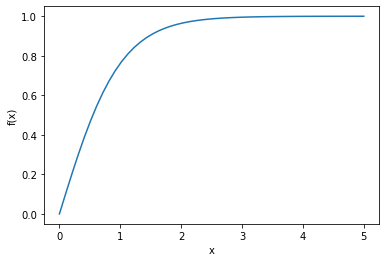

In [101]:
#let's plot some x values versus some y values;
x=np.linspace(0,5)
y=np.tanh(x)



plt.plot(x,y)
#plt.plot(x,y) values [where x,y are 1d arrays or list of input values and corresponding output values
#let's add a label
#also 
plt.ylabel('f(x)') #so plt.ylabel adds a a label on y axis to oour current plot
plt.xlabel('x')
plt.show() # displays all open figure
#NB to include plt.show() at end of plot code when working from a python script from command line, otherwise figure won't show
#but not NB when playing around in jupyter notebook as the plot will show regardless, if you're using %matplotlib.inline


#plt.plot() if you input a list automatically converts lists into np arrays then plots 



## adding some style


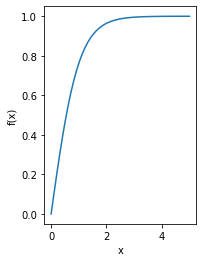

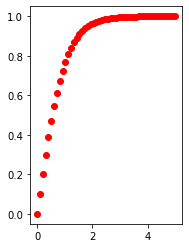

In [145]:
#plt.plt(x_array,y_array, format_string)
#third argumetn is the format string: indicates color and line type of plot
#we concatenate(chain together) the color string with line type string
#by default you'll get blue as the color and a line as a string.


#e.g.:
plt.plot(x,y, 'ro')
#red: r and circles 0
plt.axis([0, 6, 0, 20])
plt.subplot(1,2,1)
plt.plot(x,y)
#plt.plot(x,y) values [where x,y are 1d arrays or list of input values and corresponding output values
#let's add a label
#also 
plt.ylabel('f(x)') #so plt.ylabel adds a a label on y axis to oour current plot
plt.xlabel('x')
plt.show()

plt.subplot(1,2,2)
plt.plot(x,y, 'ro')







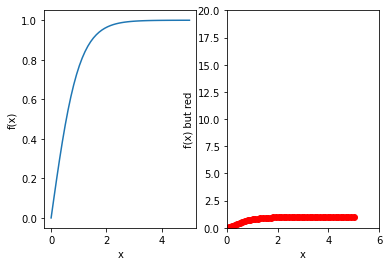

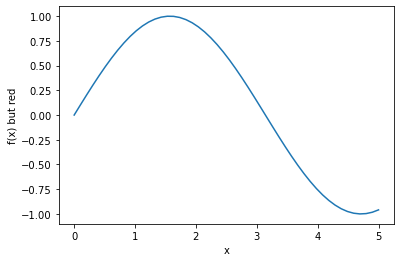

In [146]:
#more interestingly:
#notice the difference between the two plots, axis has done something
#let's put them side by side using: the subplot function:
plt.subplot(1,2,1) 

#subplot allows us to create a plot of plots, plotception if you will
#more precisely, subplot enables including multiple plots in the same figure
#parameters of subplot are the number of rows, number of columns, the current subplot in which we're plotting
#so:

#let's plot the above two plots side by side with the red dot plot on the right:
plt.subplot(1,2,1) #we only want two (2x1) plots and we want to plot in the 1st subplot(hence the 3rd parameter takes argument 1)

plt.plot(x,y) 
plt.ylabel('f(x)') 
plt.xlabel('x')

plt.subplot(1,2,2)
plt.plot(x,y, 'ro')
#red: r and circles 0
plt.axis([0, 6, 0, 20])
plt.ylabel('f(x) but red')
plt.xlabel('x')
plt.show()

#so recall we're plotting the same function in both cases 
#so notice what plt.axis([did it sort of kept the absolute size of the plot the same],
#but zoomed out such that the x-axis in the plot is from 0 to 6) and the y-axis is from 0 to 20
#it scaled the axes.

#how would the two plots be arranged in the figure if we changed the first two arguments to (2,1)
#they'd be on top of each other

#also might be very obvious but it's still worth mentioning: subplot is a very 
#useful way to investigate for yourself what different matplotlib functions do

#right we'll add some more tools to our matplotlib arsenal as we move along

#axes

#adds an axes to the current figure and makes it the current axes
plt.plot(x, np.sin(x))

plt.ylabel('f(x) but red')
plt.xlabel('x')
plt.show()



In [54]:
#another cool thing you can do if your data is in numpy arrays is plot several line
#in the same plot in one function call:
t= np.arange(1,10, 0.2) #np.arange(evenly spaced number in a given interval)


array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ,
       6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6,
       8.8, 9. , 9.2, 9.4, 9.6, 9.8])

# scikit-learn demo

We'll explore some of scikit-learn's functionality through a supervised learning task based on the famous Iris dataset.
Our task is to learn how to classify the irises in the set as their correct species: Setosa, Versicolor or Viriginica.



### Loading the data
sklearn comes with a whole bunch of datset including the iris data set(as a CSV file) and a function to load the dataset into numpy arrays.


In [6]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [16]:
iris
#corresponding numpy array
# try indexing it as we did before what happens? why?

#answer: this is actually an sklearn dataset object from which we can retrieve the
#numpy array we want using the data attribute of the object!
#iris.data containes the features for each sample but not their observed targets

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
iris.data.shape
# 150 samples,  4 measurements on each sample,

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
#to get the targets:
#they're stored int he target attribute of the dataset
iris.target
#the names of the targets
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

### Visualizing the data
Let's use matplotlib to visualize the data.
Recall our goal is to classify them!
We'll use a scatterplot (so we can only plot 4 at a time)
Question for Paul: is there an in built function to plot all 12 different plots (but really only 6 *truly* different plots for our purposes) in one go? 


In [60]:
#plotting the iris dataset:


#indices of the features that we're plotting:
x_index = 0 
y_index =1 

#formatter will label the color bar with the correct function names
formatter=plt.FuncFormatter(lambda i, *args:iris.target_names[int(i)])
plt.figure(figsize=(5,4)) #instantiate a figure of a particular size

iris.data[:,x_index]




array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

<Figure size 360x288 with 0 Axes>

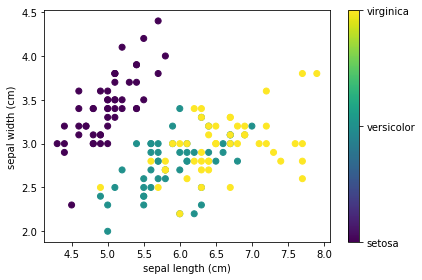

In [64]:
plt.scatter(iris.data[:,x_index], iris.data[:,y_index], c=iris.target)

#recall features are stored in colomns so in first slice we want all the rows
#and one column x_index and all the rows and another column y-index
#this will plot for each sample, it's x_index measurement vs its y_index measurement yielding a scatter plot
#c=iris.target will colour each sample according to its target value (its species)

plt.colorbar(ticks=[0,1,2], format=formatter)
#I mean the colour bar is cool but there species(singular)
#membership is absolute -you're either viriginica or you're not

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()


In [65]:
# exercise: can you create a function to plot all 12 scatter plots (one for each pair of variables(P:3 choices for each of the 4)
# pair(P:but really only 6 distinct pairs because swapping axes doesn't really change anything)
#which two features make it easiest to seprate the data?

## before we go and fit a model to it:
# let's explore how models work in scikitlearn with the simplest ML model: the linear regression model.





# The scikit-learn estimator object
-scikit learn has a whole host of "built-in" machine learning algorithm
the algorithms are represented as objects called estimator objects


In [67]:
#for example we can import linear regression model 
#class definitions
#these are untrained models and i.e. a function with parameters for which 
#we're yet
#learn, from data, values that are optimal in some sense
#i.e. linear regression models:
from sklearn.linear_model import LinearRegression 

In [70]:
#setting estimator parameters: i.e. choosing the form of our linear regression model

model = LinearRegression()
#by default it includes  an in intercept for the model
print(model)

LinearRegression()


In [82]:
#fitting on data
#let's create some data:
x = 30*np.random.random((20,1))
#returns a np array of size (20,1) of random floats in the interval 
#[0.0, 1.0)
# y = a*x + b with noise
y = 0.5 *x + 1.0 +np.random.normal(size=x.shape) 
print(np.random.normal(size=x.shape)) # a np array, the same size as x
#whose entries are independently sample from a zero mean, unit variance 
#Gaussian

model = LinearRegression()
model.fit(x,y)
#we then call the fit method on our model object to fit it to hte data


[[ 1.09690078e-01]
 [-6.24617690e-01]
 [ 8.71367881e-01]
 [-3.30368587e-02]
 [-3.81100757e-04]
 [-5.94800644e-01]
 [-1.22423785e+00]
 [ 2.01501634e-01]
 [-2.34314576e-01]
 [-1.19618293e-01]
 [-3.47555267e-01]
 [-1.55565739e+00]
 [-4.49391204e-01]
 [ 2.98335457e-01]
 [ 5.47892227e-01]
 [ 8.93121113e-01]
 [-1.88922001e-01]
 [-5.03249892e-02]
 [-4.97609563e-02]
 [-2.35320500e-01]]


LinearRegression()

In [133]:
# predict y from the data
x_new = np.linspace(0,30,100) #some test inputs
y_new = model.predict(x_new[:, np.newaxis])
#y_new = model.predict(x_new) gives an error
 
np.newaxis #increasesthe dimension of the existing array by one more dimension
#when used once see image in notes: x_new[:, np.newaxis] increases x's
#column dimension by 1 
#reason being: np.linspace(0,30,100) returns a a 1D array which is not a column vector
# to turn it into a column vector when calling predict on it we use np.newaxis
#if you don't do this you'll get an error.
#the same goes for most of the functions that we call to produce np arrays
#without specifying a shape: np.arange, np.ones



In [97]:
np.ones(5).reshape((5,1))  #always specify shapes as tuples


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [134]:
#cool so returning to our iris classification:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])





['virginica']


In [135]:
import matplotlib.pyplot as plt

In [137]:
x= np.linspace(0,5)
y=np.tanh(x)
print(x)
print(y)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.         0.10168812 0.20129477 0.29690545 0.38691202 0.47010419
 0.54570541 0.61335726 0.67306551 0.72512414 0.77003273 0.80841907
 0.8409736  0.86839883 0.89137347 0.91052931 0.92643848 0.93960819
 0.95048074 0.9594368  0.96680063 0.97284617 0.97780324 0.9818637
 0.98518694 0.98790496 0.99012673 0.99194203 0.99342468 0.99463525
 0.99562344 0.99642993 0.99708802 0.99762495 0.99806297 0.99842027
 0.99871171 0.99894941 0.99914327 0.999

Text(0.5, 0, 'x')

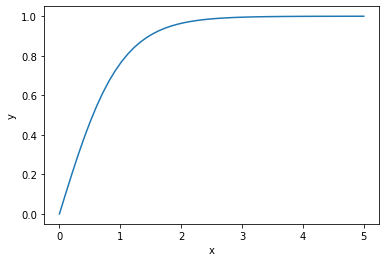

In [140]:
plt.plot(x,y)
plt.ylabel("y")
plt.xlabel('x')

Text(0.5, 0, 'x')

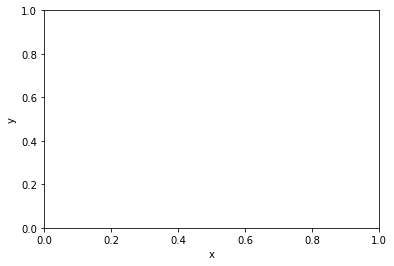

In [147]:
a1= np.array([[1,2,3],[4,5,6]])

In [148]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [149]:
a1.shape

(2, 3)

In [151]:
a1= a1.reshape((6,1))
a1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [156]:
a1.shape

(6, 1)

In [153]:
a2 = np.array([[1,2,3]])

In [154]:
a2.shape

(1, 3)

In [162]:
a1+a2
import random 

In [164]:
a4 = np.array([random.randint(0,10) for i in range(16)]).reshape((4,4))
a4

array([[ 2,  1,  2,  1],
       [ 1,  0,  4,  3],
       [ 2,  1,  8, 10],
       [ 1,  5,  9, 10]])

In [165]:
a4[:, 1]

array([1, 0, 1, 5])

In [166]:
mask = a4 > 5

In [167]:
a4[mask]

array([ 8, 10,  9, 10])